<h1 align='center'> Time Series Forecasting General Methods </h1>

We are done with analyze the data at the hand and getting graphical and numerical insights from the data. We can use the statistics of the existing data to forecast in future. 

## **Contents**

- **Forecasting with Holt-Winters method**
- **Time Series Stationarity and Differencing**
- **Descriptive statistics and tests**
- **ARMA**
- **ARIMA**
- **SARIMA**
- **SARIMAX**
- **VAR**
- **VARMA**


## Forecasting with Holt-Winter method

This method is another name of Triple Exponential Smoothing. It takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

I am using same Sales Data of Furnitures. The main objective here is to divide the dataset into 2 parts namely train and test section and then evaluate the performance of the model.


### Imports

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline


### Load the Data

In [3]:
#plot the sales data of furniture
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


Change the resample frequency and make it monthly sales instead of daily.


In [4]:
#resample the data on Monthly level
df = df.resample('MS').sum()

df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


### Train/Test split

Divide the data into `80:20` to train to test ratio.

In [6]:
df.shape

(48, 1)

In [5]:
#total length
n = len(df)
#train size
m = int(n*0.8)

train_data = df.iloc[0:m]
test_data = df.iloc[m:n]

print(f"Total df size {len(df)}")
print(f"Total train data size {len(train_data)}")
print(f"Total test data size {len(test_data)}")

Total df size 48
Total train data size 38
Total test data size 10


In [11]:
train_data.tail()

,Sales
Order Date,
2016-10-01,11872.5770
2016-11-01,31783.6288
2016-12-01,36678.7150
2017-01-01,5964.0320
2017-02-01,6866.3374


### Fitting the model


In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Sales'], trend='mul', seasonal='mul', seasonal_periods=12).fit()


/Users/ajitkumarsingh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Evaluating against test set


In [46]:
test_predictions = fitted_model.forecast(len(test_data))

In [47]:
test_predictions

2017-03-01    13763.527009
2017-04-01    12828.424876
2017-05-01    13100.634157
2017-06-01    10880.026770
2017-07-01    14485.001836
2017-08-01    10032.360087
2017-09-01    29777.813730
2017-10-01    14468.440315
2017-11-01    30588.479516
2017-12-01    31461.293604
Freq: MS, dtype: float64

### Plot test and train data

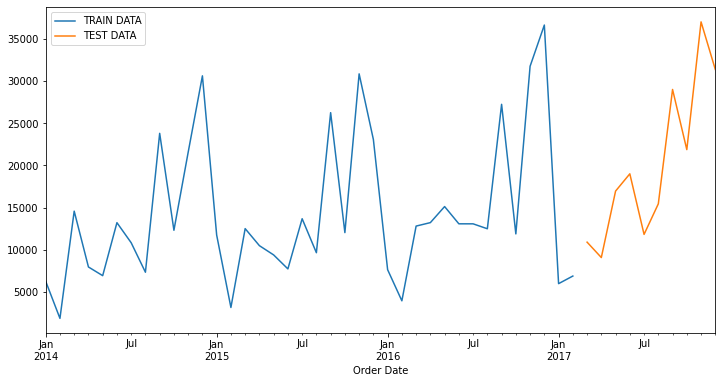

In [48]:
train_data['Sales'].plot(legend=True, label='TRAIN DATA')
test_data['Sales'].plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)

### Plot Actual vs Predicted values

<Axes: xlabel='Order Date'>

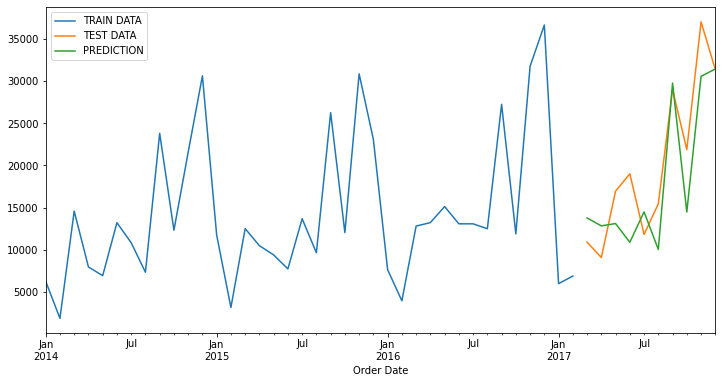

In [49]:
train_data['Sales'].plot(legend=True, label='TRAIN DATA')
test_data['Sales'].plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
test_predictions.plot(legend=True, label='PREDICTION')

### Evalution Metrics

Since this is a type of regression problem we can use regression metrics like *Mean Squared Error(MSE)* or *Root Mean Squared Error(RMSE)* or *Mean Absolute Error(MAE)*

In [52]:
mae_error = mean_absolute_error(test_data, test_predictions)

print(f"Mean absolute error of the above model is {mae_error}")

Mean absolute error of the above model is 4138.682460955162


In [53]:
mse_error = mean_squared_error(test_data, test_predictions)

print(f"Mean squared error of the above model is {mse_error}")

Mean squared error of the above model is 23713961.102707732


In [54]:
rmse_error = np.sqrt(mean_squared_error(test_data, test_predictions))

print(f"Root mean squared error of the above model is {rmse_error}")

Root mean squared error of the above model is 4869.698255817062


In [55]:
test_data.describe()

,Sales
count,10.000000
mean,20255.689980
std,9463.329001
min,9065.958100
25%,12720.235000
50%,17983.072450
75%,27242.171550
max,37056.715000


### Forecast in future

We evaluated the model by training on train data and testing it on the unknown points to the model. In this section we will see how model's forecast looks on future points which is not even in our test set.

We will train the model on whole dataset and then will try to predict on furure points.

In [56]:
fitted_model = ExponentialSmoothing(df['Sales'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/Users/ajitkumarsingh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [57]:
future_preds = fitted_model.forecast(12)

In [58]:
future_preds

2018-01-01    10145.196758
2018-02-01     5276.646045
2018-03-01    14046.143518
2018-04-01    12638.938600
2018-05-01    15347.806822
2018-06-01    14398.498944
2018-07-01    15575.177149
2018-08-01    12050.471323
2018-09-01    32198.645769
2018-10-01    15228.732215
2018-11-01    34823.955051
2018-12-01    37118.533234
Freq: MS, dtype: float64

<Axes: xlabel='Order Date'>

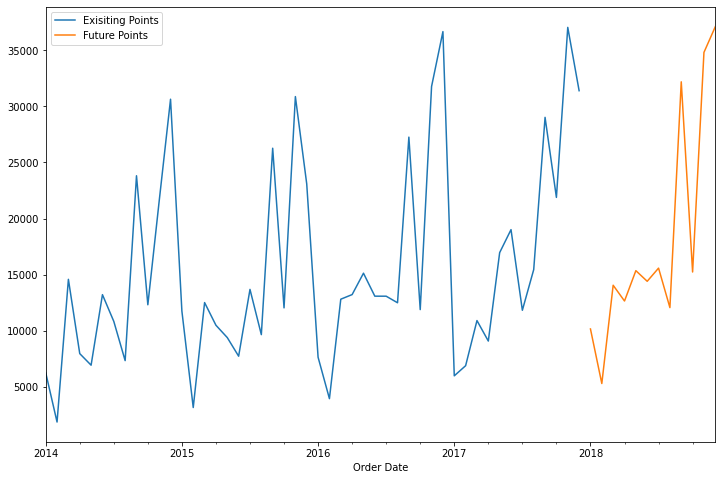

In [59]:
df['Sales'].plot(figsize=(12, 8), legend=True, label='Exisiting Points')
future_preds.plot(figsize=(12, 8), legend=True, label='Future Points')

## Time Series Stationarity and Differencing

### Stationarity

Time series said to be stationary if it does not exhibit trends or seasonality i.e fluctuations in the data are entirely due to outside factors and noises

Example:

`Samples.csv` file contains some dummy data and we can use it to illustrate satationarity.

In [4]:
df = pd.read_csv('Data/samples.csv', index_col=0, parse_dates=True)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


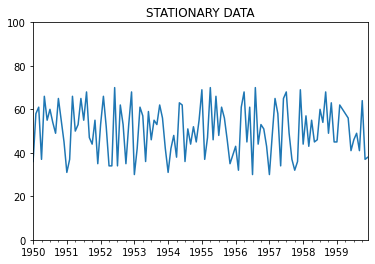

In [6]:
df['a'].plot(ylim=[0, 100], title='STATIONARY DATA').autoscale(axis='x', tight=True)


Check MA of attribute `a`

<Axes: title={'center': 'Moving Average'}>

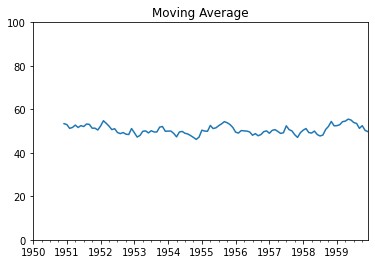

In [10]:
df['a_ma'] = df['a'].rolling(12).mean()

df['a_ma'].plot(ylim=[0, 100], title='Moving Average')

Mean seems have a nearly constant value.

**Non stationary Data**

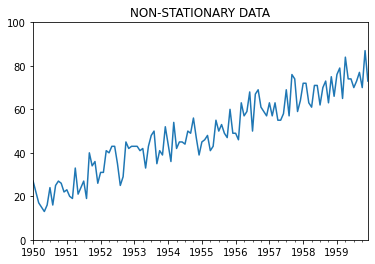

In [11]:
df['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True)

Calculate MA with window size of 12.

<Axes: title={'center': 'Moving Average'}>

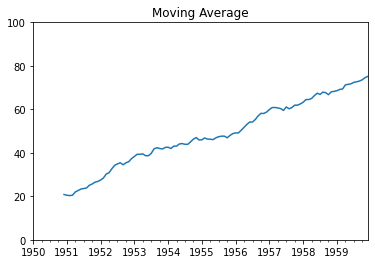

In [12]:
df['b_ma'] = df['b'].rolling(12).mean()
df['b_ma'].plot(ylim=[0, 100], title='Moving Average')

Mean does not seem same between two equidistance timestamp.

### Differencing

Non-stationary data can be made to look stationary through <em>differencing</em>. A simple differencing method calculates the difference between consecutive points.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.tools.diff.html'>statespace.tools.diff</a></strong><font color=green>(series[, k_diff, …])</font>&nbsp;&nbsp;Difference a series simply and/or seasonally along the zero-th axis.</tt></div>

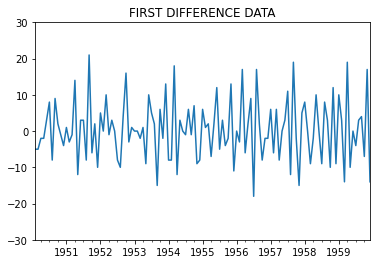

In [22]:
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['b'],k_diff=1)

df['d1'].plot(title="FIRST DIFFERENCE DATA", ylim=[-30, 30]).autoscale(axis='x',tight=True)

Let's check the MA for this series.

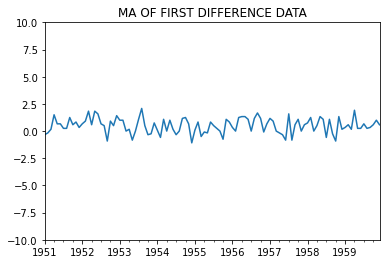

In [19]:
df['d1_ma'] = df['d1'].rolling(12).mean()

df['d1_ma'].plot(title="MA OF FIRST DIFFERENCE DATA", ylim=[-10, 10]).autoscale(axis='x',tight=True)

Clearly differencing stablized the original series and now it seems like a stationary series.

### Lagging

It is also known as `backshifting`, lagging notation reflects the value of `y` at a prior point in time. This is useful technique for performing regression.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}

<br>
<table>
<tr><td>{y_t}</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>


## Autocorrelation function/Partial autocorrelation function

We need to look at <em>covariance</em> and <em>correlation</em> as they relate to lagged (shifted) samples of a time series.

**Contents:**

* ACF and PACF charts
* Create these charts for multiple times series, one with seasonality and another without
* Calculate Orders PQD terms for ARIMA off charts

<div class="alert alert-info"><h4>Related Functions:</h4>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acovf.html'>stattools.acovf</a></strong><font color=green>(x[, unbiased, demean, fft, …])</font>&nbsp;Autocovariance for 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html'>stattools.acf</a></strong><font color=green>(x[, unbiased, nlags, qstat, …])</font>&nbsp;&nbsp;Autocorrelation function for 1d arrays<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html'>stattools.pacf</a></strong><font color=green>(x[, nlags, method, alpha])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Partial autocorrelation estimated<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_yw.html'>stattools.pacf_yw</a></strong><font color=green>(x[, nlags, method])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Partial autocorrelation estimated with non-recursive yule_walker<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_ols.html'>stattools.pacf_ols</a></strong><font color=green>(x[, nlags])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate partial autocorrelations</tt>
   
<h4>Related Plot Methods:</h4>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html'>tsaplots.plot_acf</a></strong><font color=green>(x)</font>&nbsp;&nbsp;&nbsp;Plot the autocorrelation function<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html'>tsaplots.plot_pacf</a></strong><font color=green>(x)</font>&nbsp;&nbsp;Plot the partial autocorrelation function</tt>


### Imports


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm

/Users/ajitkumarsingh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings("ignore")

### Autocovariance for 1D

In a <em>deterministic</em> process, like $y=sin(x)$, we always know the value of $y$ for a given value of $x$. However, in a <em>stochastic</em> process there is always some randomness that prevents us from knowing the value of $y$. Instead, we analyze the past (or <em>lagged</em>) behavior of the system to derive a probabilistic estimate for $\hat{y}$.

One useful descriptor is <em>covariance</em>. When talking about dependent and independent $x$ and $y$ variables, covariance describes how the variance in $x$ relates to the variance in $y$. Here the size of the covariance isn't really important, as $x$ and $y$ may have very different scales. However, if the covariance is positive it means that $x$ and $y$ are changing in the same direction, and may be related.

With a time series, $x$ is a fixed interval. Here we want to look at the variance of $y_t$ against lagged or shifted values of $y_{t+k}$


For a stationary time series, the autocovariance function for $\gamma$ (gamma) is given as:

${\displaystyle {\gamma}_{XX}(t_{1},t_{2})=\operatorname {Cov} \left[X_{t_{1}},X_{t_{2}}\right]=\operatorname {E} [(X_{t_{1}}-\mu _{t_{1}})(X_{t_{2}}-\mu _{t_{2}})]}$

We can calculate a specific $\gamma_k$ with:

${\displaystyle \gamma_k = \frac 1 n \sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})}$


**Example**

<Axes: >

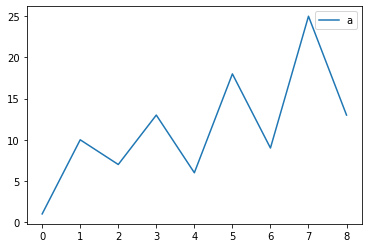

In [4]:
df = pd.DataFrame({'a':[1, 10, 7, 13, 6, 18, 9, 25, 13]})

df.plot()

Using statsmodels

In [8]:
from statsmodels.tsa.stattools import acovf, acf
arr = acovf(df['a'])

arr

array([ 44.22222222,  -6.30864198,  19.60493827, -11.62962963,
         7.80246914, -13.58024691,  -0.14814815, -15.9382716 ,
        -1.91358025])

#### Unbiased autocovariance

Note that the number of terms in the calculations above are decreasing. Statsmodels can return an "unbiased" autocovariance where instead of dividing by n instaed of $n-k$.


In [9]:
arr1 = acovf(df['a'])

arr1

array([ 44.22222222,  -6.30864198,  19.60493827, -11.62962963,
         7.80246914, -13.58024691,  -0.14814815, -15.9382716 ,
        -1.91358025])

### Autocorrelation for 1D

The correlation $\rho$ (rho) between two variables $y_1,y_2$ is given as:

### $\rho = \frac {\operatorname E[(y_1−\mu_1)(y_2−\mu_2)]} {\sigma_{1}\sigma_{2}} = \frac {\operatorname {Cov} (y_1,y_2)} {\sigma_{1}\sigma_{2}}$,

where $E$ is the expectation operator, $\mu_{1},\sigma_{1}$ and $\mu_{2},\sigma_{2}$ are the means and standard deviations of $y_1$ and $y_2$.

When working with a single variable (i.e. <em>autocorrelation</em>) we would consider $y_1$ to be the original series and $y_2$ a lagged version of it. Note that with autocorrelation we work with $\bar y$, that is, the full population mean, and <em>not</em> the means of the reduced set of lagged factors (see note below).

Thus, the formula for $\rho_k$ for a time series at lag $k$ is:

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$

This can be written in terms of the covariance constant $\gamma_k$ as:

${\displaystyle \rho_k = \frac {\gamma_k n} {\gamma_0 n} = \frac {\gamma_k} {\sigma^2}}$

Note that ACF values are bound by -1 and 1. That is, ${\displaystyle -1 \leq \rho_k \leq 1}$

In [10]:
arr3 = acf(df['a'])

arr3

array([ 1.        , -0.14265773,  0.44332775, -0.26298157,  0.17643774,
       -0.30709101, -0.00335008, -0.36041318, -0.04327192])

### Partial Autocorrelation

Partial autocorrelations measure the linear dependence of one variable after removing the effect of other variable(s) that affect both variables. That is, the partial autocorrelation at lag $k$ is the autocorrelation between $y_t$ and $y_{t+k}$ that is not accounted for by lags $1$ through $k−1$.

A common method employs the non-recursive <a href='https://en.wikipedia.org/wiki/Autoregressive_model#Calculation_of_the_AR_parameters'>Yule-Walker Equations</a>:

$\phi_0 = 1\\
\phi_1 = \rho_1 = -0.50\\
\phi_2 = \frac {\rho_2 - {\rho_1}^2} {1-{\rho_1}^2} = \frac {(-0.20) - {(-0.50)}^2} {1-{(-0.50)}^2}= \frac {-0.45} {0.75} = -0.60$

As $k$ increases, we can solve for $\phi_k$ using matrix algebra and the <a href='https://en.wikipedia.org/wiki/Levinson_recursion'>Levinson–Durbin recursion</a> algorithm which maps the sample autocorrelations $\rho$ to a <a href='https://en.wikipedia.org/wiki/Toeplitz_matrix'>Toeplitz</a> diagonal-constant matrix.

$\displaystyle \begin{pmatrix}\rho_0&\rho_1&\cdots &\rho_{k-1}\\
\rho_1&\rho_0&\cdots &\rho_{k-2}\\
\vdots &\vdots &\ddots &\vdots \\
\rho_{k-1}&\rho_{k-2}&\cdots &\rho_0\\
\end{pmatrix}\quad \begin{pmatrix}\phi_{k1}\\\phi_{k2}\\\vdots\\\phi_{kk}\end{pmatrix}
\mathbf = \begin{pmatrix}\rho_1\\\rho_2\\\vdots\\\rho_k\end{pmatrix}$

In [12]:
from statsmodels.tsa.stattools import pacf_yw
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.14265773,  0.43176344, -0.20758442, -0.04572862])

<div class="alert alert-info"><strong>NOTE:</strong> We passed in <tt><font color=green>method='mle'</font></tt> above in order to use biased ACF coefficients. "mle" stands for "maximum likelihood estimation". Alternatively we can pass <tt>method='unbiased'</tt> (the statsmodels default):</div>

In [14]:
arr4 = pacf_yw(df['a'],nlags=4,method='adjusted')
arr4

array([ 1.        , -0.16048995,  0.5586243 , -0.39456104,  0.01906252])

#### Partial autocrrelation with OLS

This provides partial autocorrelations with <a href='https://en.wikipedia.org/wiki/Ordinary_least_squares'>ordinary least squares</a> (OLS) estimates for each lag instead of Yule-Walker.

In [15]:
from statsmodels.tsa.stattools import pacf_ols
arr5 = pacf_ols(df['a'],nlags=4)
arr5

array([ 1.        , -0.13833492,  1.13495418, -0.04476691,  0.5979815 ])

### Plotting

The arrays returned by `.acf(df)` and `.pacf_yw(df)` show the magnitude of the autocorrelation for a given $y$ at time $t$.

Pandas has a built-in plotting function that plots increasing $y_t$ values on the horizontal axis against lagged versions of the values $y_{t+1}$ on the vertical axis. If a dataset is non-stationary with an upward trend, then neighboring values should trend in the same way.

In [16]:
from pandas.plotting import lag_plot


In [26]:
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [53]:
#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Office Supplies']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340


In [54]:
df = df.resample('W').sum()

df.head()

,Sales
Order Date,
2014-01-05,324.044
2014-01-12,708.004
2014-01-19,2337.764
2014-01-26,1143.170
2014-02-02,368.784


<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

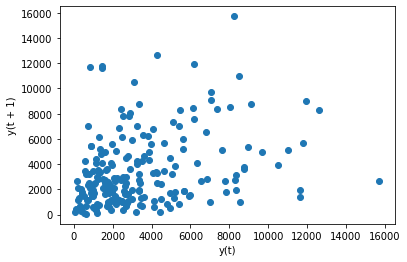

In [55]:
lag_plot(df['Sales'])

This does not show strong relationship since the time series is nearly stationary.

### ACF Plots

Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about time series.

Example:


In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [57]:
acf(df['Sales'])

array([ 1.00000000e+00,  3.12440082e-01,  2.49173025e-01,  1.39336867e-01,
        1.84489786e-01,  1.67531418e-01,  1.11379734e-01,  1.84930768e-01,
        8.24198806e-02,  8.74684994e-02,  4.89924777e-02,  6.22098365e-02,
        1.65448013e-01,  1.49072360e-01,  7.97573259e-02,  7.65911202e-02,
        7.55594141e-02, -7.46386648e-04,  4.97054222e-02, -2.10402529e-02,
       -2.49880823e-02, -6.68093251e-02, -1.79718855e-02, -3.42941758e-02])

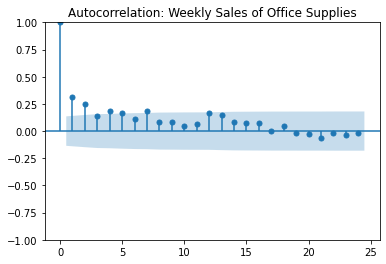

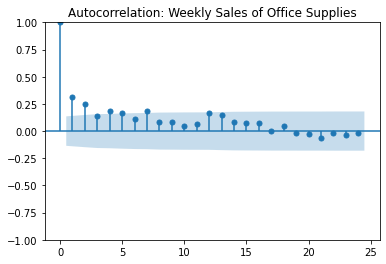

In [60]:
title = 'Autocorrelation: Weekly Sales of Office Supplies'
lags = 40
plot_acf(df['Sales'], title=title)

This is a typical ACF plot for stationary data, with lags on the horizontal axis and correlations on the vertical axis. The first value $y_0$ is always 1. A sharp dropoff indicates that there is no AR component in the ARIMA model.

**With non stationary data**

### PACF Plots

It works best with stationary data. Let's look at the sales data again.

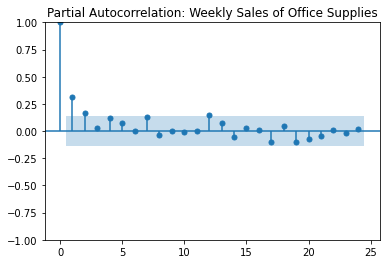

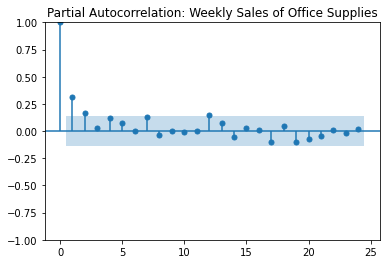

In [61]:
title = 'Partial Autocorrelation: Weekly Sales of Office Supplies'
lags = 40
plot_pacf(df['Sales'], title=title)

**With non-stationary data**

<div class="alert alert-success"><strong>A NOTE ABOUT AUTOCORRELATION:</strong> We can use lagged correlations using the Pearson Correlation Coefficient given by:<br><br>

${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}$

These are easily calculated in numpy with <tt>numpy.corrcoef(x,y)</tt> and in Excel with <tt>=CORREL(x,y)</tt>.<br><br>
Using our example, $r_0$ is still $1$, but to solve for $r_1$:

However, there are some shortcomings. Using the Pearson method, the second-to-last term $r_{k-1}$ will always be $1$ and the last term $r_k$ will always be undefined.
</div>

## Autoregressive Model

In moving average model like Holt-Winters, we forecast the variable of interest using a linear combination of predictors. 

In an autoregressive model, we forecast using a linear combinations of past values of the variable. The term autoregressive describes a regression of the variable against itself. An autoregression is run against a set of lagged values of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.


<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=green>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=green>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

Let's look at the Furniture sales data.

### Imports

In [66]:
import pandas as pd
import numpy as np
%matplotlib inline

### Load the Data

In [71]:
# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [162]:
df = df.resample('M').sum()

df.head()

,Sales
Order Date,
2014-01-31,5618.859
2014-02-28,2463.324
2014-03-31,13448.468
2014-04-30,8439.321
2014-05-31,5745.482


### Plotting

[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

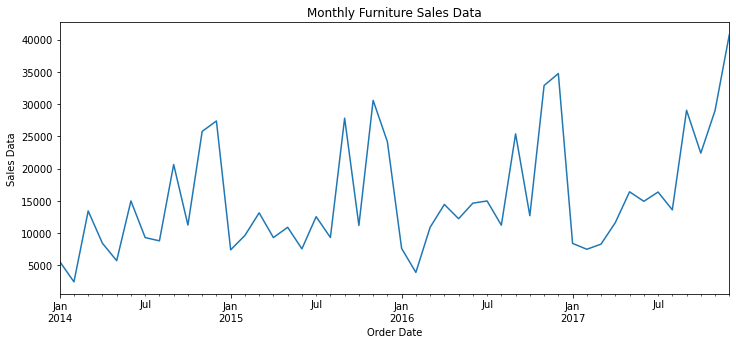

In [163]:
title='Monthly Furniture Sales Data'
ylabel='Sales Data'
xlabel='Order Date'

ax = df['Sales'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### Split the data into train/test sets
The goal in this section is to:
* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

<div class="alert alert-info"><strong>NOTE: </strong>For many training and testing applications we would use the <tt>train_test_split()</tt> function available from Python's <a href='https://scikit-learn.org/stable/'>scikit-learn</a> library. This won't work here as <tt>train_test_split()</tt> takes <em>random samples</em> of data from the population.</div>

In [164]:
len(df)

48

Data is on week level and Suppose I want to forecast for next 1 year so in this case the test set size should be equal to 52 weeks or 52 points.

In [165]:
train = df.iloc[:len(df)-6]
test = df.iloc[len(df)-6:]

print(f"Train size is {len(train)}")
print(f"Test size is {len(test)}")

Train size is 42
Test size is 6


### Model's fitting

In [166]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.ar_model import AutoReg

Fit an autoregressive model with order(p) = 1

In [202]:
mod1 = AutoReg(train['Sales'], 1, old_names=False)
res1 = mod1.fit()
print(res1.summary())


                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     AutoReg(1)   Log Likelihood                -425.369
Method:               Conditional MLE   S.D. of innovations           7753.664
Date:                Sat, 26 Aug 2023   AIC                            856.738
Time:                        17:04:48   BIC                            861.879
Sample:                    02-28-2014   HQIC                           858.610
                         - 06-30-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.128e+04   2434.613      4.631      0.000    6503.709     1.6e+04
Sales.L1       0.2133      0.150      1.419      0.156      -0.081       0.508
                                    Roots           

In [203]:
print(f'Lag: {res1.arfreq}')
print(f'Coefficients:\n{res1.params}')

Lag: [0.]
Coefficients:
const       11275.463768
Sales.L1        0.213349
dtype: float64


In [208]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = res1.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [209]:
predictions1

2017-07-31    14463.662359
2017-08-31    14361.273027
2017-09-30    14339.428356
2017-10-31    14334.767815
2017-11-30    14333.773493
2017-12-31    14333.561355
Freq: M, Name: AR(1) Predictions, dtype: float64

In [210]:
#Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['Sales'][i]}")

predicted=14463.66236, expected=16380.9642
predicted=14361.27303, expected=13623.496
predicted=14339.42836, expected=29053.728000000003
predicted=14334.76781, expected=22412.126200000002
predicted=14333.77349, expected=29011.936999999998
predicted=14333.56135, expected=40754.002799999995


<Axes: xlabel='Order Date'>

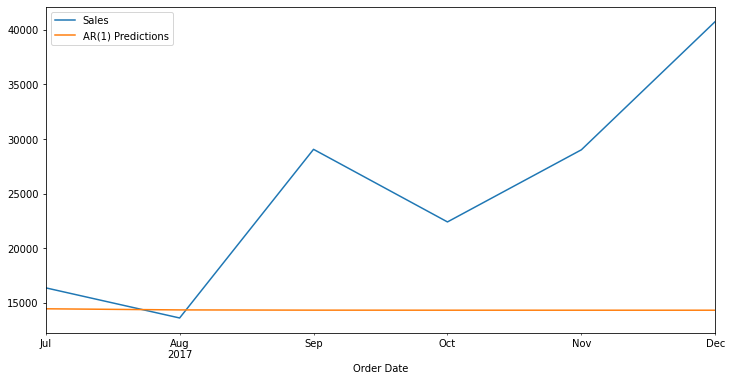

In [211]:
test['Sales'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))

### Fitting an AR(6) model

In [212]:
mod6 = AutoReg(train['Sales'], 6)
res6 = mod6.fit()
print(res6.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     AutoReg(6)   Log Likelihood                -372.453
Method:               Conditional MLE   S.D. of innovations           7532.426
Date:                Sat, 26 Aug 2023   AIC                            760.906
Time:                        17:05:18   BIC                            773.574
Sample:                    07-31-2014   HQIC                           765.327
                         - 06-30-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.892e+04   5655.402      3.345      0.001    7833.787       3e+04
Sales.L1       0.1358      0.166      0.815      0.415      -0.191       0.462
Sales.L2      -0.0391      0.164     -0.238      0.8

In [213]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions6 = res6.predict(start=start, end=end, dynamic=False).rename('AR(6) Predictions')

In [214]:
predictions6

2017-07-31    17353.722450
2017-08-31    16861.641613
2017-09-30    15121.035234
2017-10-31    14935.259943
2017-11-30    14183.753740
2017-12-31    14125.827519
Freq: M, Name: AR(6) Predictions, dtype: float64

<Axes: xlabel='Order Date'>

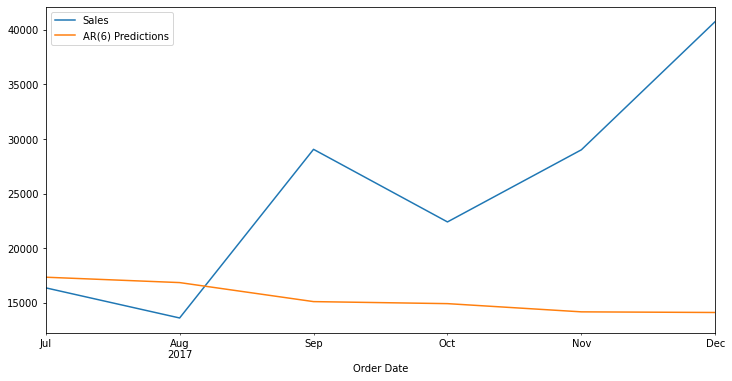

In [215]:
test['Sales'].plot(legend=True)
predictions6.plot(legend=True,figsize=(12,6))

Instead of choosing the order(p), we can let `statsmodel` to find out best p value for us.

### Fit an AR(p) model

In [216]:
from statsmodels.tsa.ar_model import ar_select_order

In [217]:
p = ar_select_order(train['Sales'], maxlag=15)

In [218]:
p.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

Fit the model with p as 12

In [220]:
mod12 = AutoReg(train['Sales'], 12)
res12 = mod12.fit()
print(res12.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   42
Model:                    AutoReg(12)   Log Likelihood                -287.174
Method:               Conditional MLE   S.D. of innovations           3475.564
Date:                Sat, 26 Aug 2023   AIC                            602.347
Time:                        17:05:47   BIC                            621.964
Sample:                    01-31-2015   HQIC                           608.623
                         - 06-30-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8305.2257   8699.855      0.955      0.340   -8746.177    2.54e+04
Sales.L1       0.0125      0.091      0.137      0.891      -0.166       0.191
Sales.L2       0.0337      0.093      0.365      0.7

In [221]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions12 = res12.predict(start=start, end=end, dynamic=False).rename('AR(6) Predictions')

<Axes: xlabel='Order Date'>

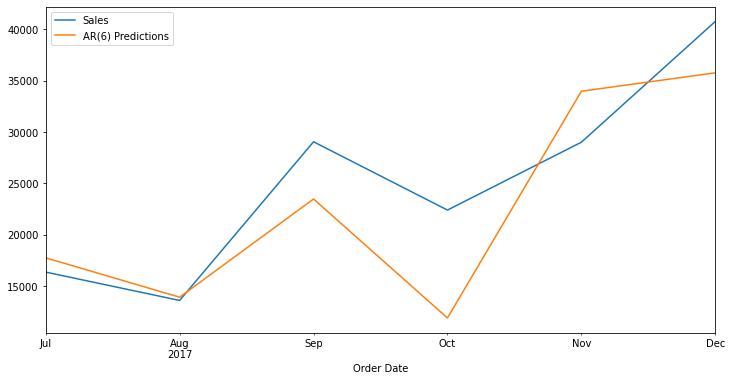

In [222]:
test['Sales'].plot(legend=True)
predictions12.plot(legend=True,figsize=(12,6))

This seems far better than earlier models with order 6 and 1

### Model's Evaluation

In [223]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(6)','AR(12)']
preds = [predictions1, predictions6, predictions12]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['Sales'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 199910484.0
AR(6) Error: 198398340.0
AR(12) Error: 32106243.89


Clearly model AR(12) outperform the other models with lower order.

Another method is the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> (AIC), which does a better job of evaluating models by avoiding overfitting.<br>
Fortunately this is available directly from the fit model object.

In [224]:
modls = [res1,res6,res12]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 856.74
AR(6) AIC: 760.91
AR(12) AIC: 602.35


### Forecasting in future
Now we are ready to train our model whole data and predict thje future sales.

In [229]:
#fit the model over whole data
mod12 = AutoReg(df['Sales'], 12)
res12 = mod12.fit()
print(res12.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                   48
Model:                    AutoReg(12)   Log Likelihood                -346.733
Method:               Conditional MLE   S.D. of innovations           3686.905
Date:                Sat, 26 Aug 2023   AIC                            721.467
Time:                        17:14:19   BIC                            743.636
Sample:                    01-31-2015   HQIC                           729.204
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3301.0384   7199.471      0.459      0.647   -1.08e+04    1.74e+04
Sales.L1       0.0888      0.086      1.033      0.302      -0.080       0.257
Sales.L2       0.0156      0.089      0.175      0.8

In [230]:
start = len(df)
end = len(df)+12

pred_future = res12.predict(start=start, end=end, dynamic=False)

pred_future

2018-01-31    10539.256282
2018-02-28     8971.701857
2018-03-31     6709.259836
2018-04-30     9394.932797
2018-05-31    19602.224067
2018-06-30    16080.154011
2018-07-31    19322.470654
2018-08-31    16801.009220
2018-09-30    29752.897947
2018-10-31    26098.642297
2018-11-30    30031.975497
2018-12-31    41938.762520
2019-01-31    12518.082274
Freq: M, dtype: float64

<Axes: xlabel='Order Date'>

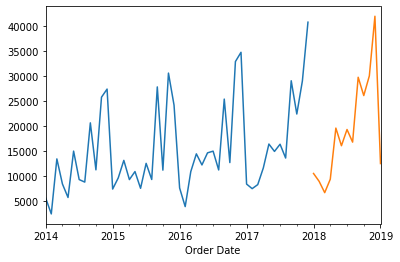

In [231]:
df['Sales'].plot()
pred_future.plot()

## Autoregressive Moving Average(ARMA) Model

It's a class of time series models used for analyzing and forecasting time-dependent data. ARMA models are used to describe and capture the patterns and dependencies present in a time series dataset. They combine autoregressive (AR) and moving average (MA) components.

1. **AutoRegressive (AR) Component**: The AR part of an ARMA model involves modeling the current value of the series as a linear combination of its previous values (lags). An AR(p) model considers the relationship between the current value and the p previous values. The equation for an AR(p) model is:

   $y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \ldots + \phi_p y_{t-p} + \varepsilon_t$

   where $y_t$ is the current value of the time series at time $t$, $c$ is a constant, $\phi_1$, $\phi_2$, $\ldots$, $\phi_p$ are the autoregressive coefficients, $y_{t-1}$, $y_{t-2}$, $\ldots$, $y_{t-p}$ are the lagged values, and $\varepsilon_t$ is the white noise error term.

2. **Moving Average (MA) Component**: The MA part of an ARMA model involves modeling the current value of the series as a linear combination of the current and past white noise error terms. An MA(q) model considers the relationship between the current value and the q previous error terms. The equation for an MA(q) model is:

    $y_t = c + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_q \varepsilon_{t-q} + \varepsilon_t$

   where $y_t$, $c$, $theta_1$, $theta_2$, $\ldots$, $theta_q$, $\varepsilon_{t-1}$, $\varepsilon_{t-2}$, $\ldots$, $\varepsilon_{t-q}$, and $\varepsilon_t$ are similar to the AR model.

Combining both the AR and MA components, an ARMA(p, q) model is defined as:

$y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \ldots + \phi_p y_{t-p} + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_q \varepsilon_{t-q} + \varepsilon_t$




*ARMA(p=1, q=1) = MA(q=1) + AR(p=1)*

So if AR(1) follow the formula:


&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

and if MA(1) follow the formula:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

Then ARMA(1, 1) can be given by:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$


**Note**

- ARMA models can be used on stationary datasets.
- For non-stationary datasets with a trend component, ARIMA models apply a differencing coefficient as well.

<div class="alert alert-info"><h4>Related Functions:</h4>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMA.html'>arima_model.ARMA</a></strong><font color=green>(endog, order[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Autoregressive Moving Average ARMA(p,q) model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.html'>arima_model.ARMAResults</a></strong><font color=green>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;Class to hold results from fitting an ARMA model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.kalmanf.kalmanfilter.KalmanFilter.html'>kalmanf.kalmanfilter.KalmanFilter</a></strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kalman Filter code intended for use with the ARMA model</tt>

### Imports


In [233]:
pip install pmdarima

     |████████████████████████████████| 608 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 17.7 MB 3.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [245]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [235]:
#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)


,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [236]:
df = df.resample('MS').sum()

In [237]:
df.head()

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


### Automate the augmented Dickey-Fuller Test

To check if the series is stationary let's write a function that perform the augmented Dickey-Fuller Test.


In [238]:
from statsmodels.tsa.stattools import adfuller

In [239]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### Plot the original data


<Axes: xlabel='Order Date'>

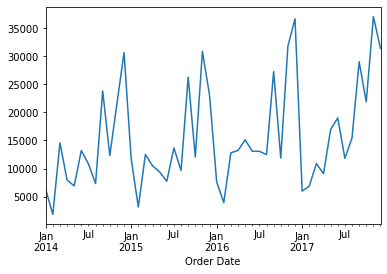

In [240]:
df['Sales'].plot()

**Run the augmented dickey-fuller test**

In [241]:
adf_test(df['Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.699026
p-value                  0.000085
# lags used              0.000000
# observations          47.000000
critical value (1%)     -3.577848
critical value (5%)     -2.925338
critical value (10%)    -2.600774
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Determine the (p,q) ARMA orders

I will be using <tt>pmdarima.auto_arima</tt> to get $p$ and $q$ value recommendations for the dataset.

In [247]:
auto_arima(df['Sales'], seasonal=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -502.820
Date:                Sat, 26 Aug 2023   AIC                           1011.640
Time:                        18:43:58   BIC                           1017.253
Sample:                    01-01-2014   HQIC                          1013.761
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.084e+04   2695.066      4.021      0.000    5554.237    1.61e+04
ar.L1          0.3056      0.131      2.328      0.020       0.048       0.563
sigma2      7.318e+07      0.160   4.56e+08      0.000    7.32e+07    7.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.98   Prob(JB):                         0.16
Heteroskedasticity (H):               1.88   Skew:                             0.64
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.09e+24. Standard errors may be unstable.
"""

### Split the data

In [249]:
train = df.iloc[:len(df)-6]
test = df.iloc[len(df)-6:]

len(train), len(test)

(42, 6)

### Fit an ARMA(p,q) model

If you want you can run <tt>help(ARMA)</tt> to learn what incoming arguments are available/expected, and what's being returned.

In [250]:
help(ARMA)

Help on class ARMA in module statsmodels.tsa.arima_model:

class ARMA(builtins.object)
 |  ARMA(*args, **kwargs)
 |  
 |  ARMA has been deprecated in favor of the new implementation
 |  
 |  See Also
 |  --------
 |  statsmodels.tsa.arima.model.ARIMA
 |      ARIMA models with a variety of parameter estimators
 |  statsmodels.tsa.statespace.SARIMAX
 |      SARIMAX models estimated using MLE
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [253]:
from statsmodels.tsa.arima.model import ARIMA

In [258]:
model = ARIMA(train['Sales'],order=(2,0,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -436.980
Date:                Sat, 26 Aug 2023   AIC                            885.960
Time:                        19:27:54   BIC                            896.386
Sample:                    01-01-2014   HQIC                           889.782
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.418e+04   1427.017      9.934      0.000    1.14e+04     1.7e+04
ar.L1          0.6732      0.810      0.831      0.406      -0.914       2.260
ar.L2          0.1773      0.842      0.211      0.833      -1.474       1.828
ma.L1         -0.5278      0.739     -0.714      0.475      -1.977       0.921
ma.L2         -0.4528      0.771     -0.587      0.557      -1.964       1.059
sigma2       7.04e+07      0.014   4.87e+09      0.000    7.04e+07    7.04e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.53
Prob(Q):                              0.93   Prob(JB):                         0.01
Heteroskedasticity (H):               1.31   Skew:                             1.10
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.06e+25. Standard errors may be unstable.
"""

In [259]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

In [260]:
predictions

2017-07-01    13115.074274
2017-08-01    12031.112109
2017-09-01    12543.910511
2017-10-01    12696.894189
2017-11-01    12890.811965
2017-12-01    13048.480047
Freq: MS, Name: ARMA(2,2) Predictions, dtype: float64

### Plot predictions against known values

[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

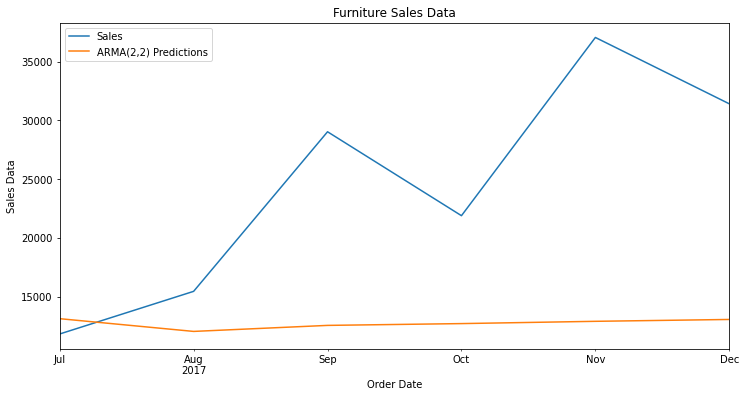

In [261]:
title = 'Furniture Sales Data'
ylabel='Sales Data'
xlabel='Order Date' # we don't really need a label here

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

## Autoregressive Integreted Moving Average(ARIMA)

It's a more comprehensive and flexible time series modeling approach compared to the ARMA model. ARIMA models are used for analyzing, forecasting, and understanding time series data that might exhibit trends, seasonality, and other complex patterns.

ARIMA models are built on three main components:

1. **AutoRegressive (AR) Component**: Similar to the AR component in ARMA models, this part models the relationship between the current value and past values of the time series. It captures the effect of previous observations on the current one.

2. **Integrated (I) Component**: The "I" in ARIMA stands for "Integrated." This component accounts for differencing the series to achieve stationarity. Many time series datasets are non-stationary, meaning they have trends, seasonality, or other patterns that change over time. Differencing involves subtracting the previous observation from the current observation to remove trends and make the series stationary.

3. **Moving Average (MA) Component**: Similar to the MA component in ARMA models, this part models the relationship between the current value and past error terms. It captures the influence of past forecast errors on the current value.

An ARIMA(p, d, q) model is defined by these three components:

- $p$ represents the order of the AutoRegressive (AR) component.
- $d$ represents the degree of differencing required to make the series stationary.
- $q$ represents the order of the Moving Average (MA) component.

The equation for an ARIMA(p, d, q) model can be written as:

$y_t' = c + \phi_1 y_{t-1}' + \phi_2 y_{t-2}' + \ldots + \phi_p y_{t-p}' + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_q \varepsilon_{t-q} + \varepsilon_t$

Where:
- $y_t'$ is the differenced series.
- $c$ is a constant term.
- $\phi_1$, $\phi_2$, $\ldots$, $\phi_p$ are the autoregressive coefficients.
- $\theta_1$, $\theta_2$, $\ldots$, $\theta_q$ are the moving average coefficients.
- $\varepsilon_t$ represents the white noise error term.

To fit an ARIMA model to a time series dataset, you typically start by identifying the appropriate values of $p$, $d$, and $q$, often through techniques like autocorrelation and partial autocorrelation plots. Then, you can use methods like maximum likelihood estimation to estimate the model parameters and make forecasts.

### Load the data 

In [262]:
#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [264]:
df = df.resample('MS').sum()

In [265]:
df.head()

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


### Plot the data

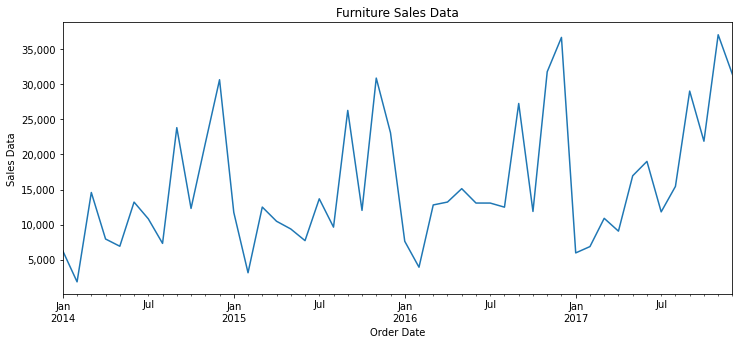

In [266]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Furniture Sales Data'
ylabel='Sales Data'
xlabel='Order Date' 

ax = df['Sales'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### ETS Decomposition

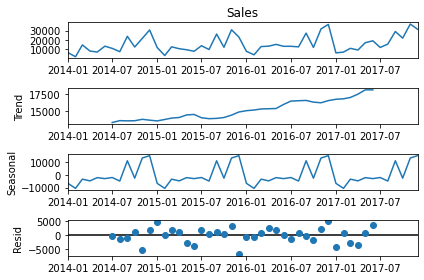

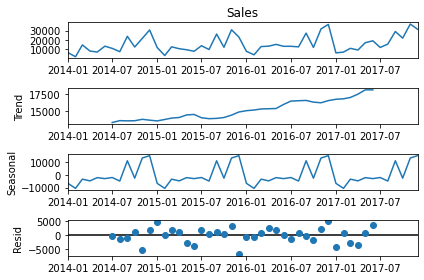

In [267]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive')  # model='add' also works
result.plot()

Here we see that the seasonal component does not contribute significantly to the behavior of the series.
#### Use <tt>pmdarima.auto_arima</tt> to determine ARIMA Orders

In [268]:
auto_arima(df['Sales'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -502.820
Date:                Sat, 26 Aug 2023   AIC                           1011.640
Time:                        19:55:36   BIC                           1017.253
Sample:                    01-01-2014   HQIC                          1013.761
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.084e+04   2695.066      4.021      0.000    5554.237    1.61e+04
ar.L1          0.3056      0.131      2.328      0.020       0.048       0.563
sigma2      7.318e+07      0.160   4.56e+08      0.000    7.32e+07    7.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.98   Prob(JB):                         0.16
Heteroskedasticity (H):               1.88   Skew:                             0.64
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.09e+24. Standard errors may be unstable.
"""

This suggests that we should fit an `ARIMA(1,0,0)` model to best forecast future values of the series. Before we train the model, let's look at augmented Dickey-Fuller Test, and the ACF/PACF plots to see if they agree. These steps are optional, and we would likely skip them in practice.

### Augmented dickey-fuller test on first difference

In [269]:
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['Sales'], k_diff=1)

adf_test(df['d1'], 'Furniture Sales Data')

Augmented Dickey-Fuller Test: Furniture Sales Data
ADF test statistic     -1.147459e+01
p-value                 5.167971e-21
# lags used             1.000000e+01
# observations          3.600000e+01
critical value (1%)    -3.626652e+00
critical value (5%)    -2.945951e+00
critical value (10%)   -2.611671e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Run the ACF and PACF plots

A <strong>PACF Plot</strong> can reveal recommended AR(p) orders, and an <strong>ACF Plot</strong> can do the same for MA(q) orders.<br>
Alternatively, we can compare the stepwise <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike Information Criterion (AIC)</a> values across a set of different (p,q) combinations to choose the best combination.

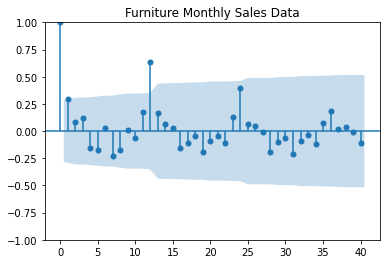

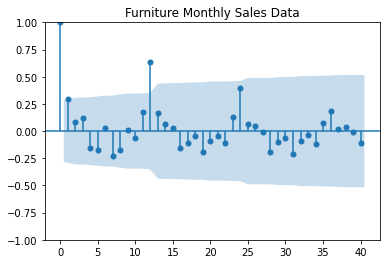

In [273]:
title = 'Furniture Monthly Sales Data'
lags = 40
plot_acf(df['Sales'],title=title,lags=lags)

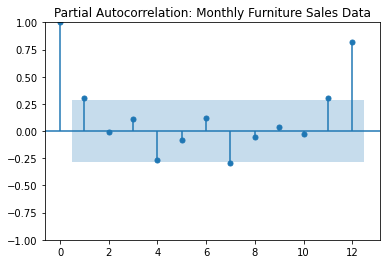

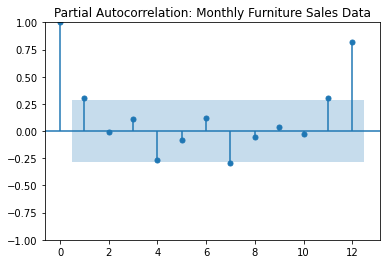

In [275]:
title = 'Partial Autocorrelation: Monthly Furniture Sales Data'
lags = 12
plot_pacf(df['Sales'],title=title,lags=lags)

This tells us that the AR component should be more important than MA. From the <a href='https://people.duke.edu/~rnau/411arim3.htm'>Duke University Statistical Forecasting site</a>:<br>
> <em>If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we    say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more    easily by adding AR terms than by adding MA terms.</em><br>

Let's take a look at <tt>pmdarima.auto_arima</tt> done stepwise to see if having $p$ and $q$ terms the same still makes sense:

In [277]:
stepwise_fit = auto_arima(df['Sales'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1078.259, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1026.129, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1059.367, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1022.619, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1018.040, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1018.347, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1020.706, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1019.172, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1015.561, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1013.580, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1011.909, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1014.386, Time=0.01 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1013.938, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1011.640, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -502.820
Date:                Sat, 26 Aug 2023   AIC                           1011.640
Time:                        20:13:36   BIC                           1017.253
Sample:                    01-01-2014   HQIC                          1013.761
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.084e+04   2695.066      4.021      0.000    5554.237    1.61e+04
ar.L1          0.3056      0.131      2.328      0.020       0.048       0.563
sigma2      7.318e+07      0.160   4.56e+08      0.000    7.32e+07    7.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.98   Prob(JB):                         0.16
Heteroskedasticity (H):               1.88   Skew:                             0.64
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.09e+24. Standard errors may be unstable.
"""

### Split the data

In [278]:
n = len(df)
test_size = 12
train = df.iloc[:n-test_size]
test = df.iloc[n-test_size:]

### Fit an ARIMA(1,0,0) Model

In [292]:
model = ARIMA(train['Sales'], order=(1, 0, 0))

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -376.058
Date:                Sat, 26 Aug 2023   AIC                            758.116
Time:                        20:21:06   BIC                            762.867
Sample:                    01-01-2014   HQIC                           759.774
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.463e+04   1934.689      7.561      0.000    1.08e+04    1.84e+04
ar.L1          0.2825      0.170      1.658      0.097      -0.051       0.616
sigma2      6.929e+07      0.134   5.15e+08      0.000    6.93e+07    6.93e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.92   Prob(JB):                         0.11
Heteroskedasticity (H):               1.40   Skew:                             0.83
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.34e+23. Standard errors may be unstable.
"""

In [293]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,0,0) Predictions')

In [294]:
predictions

2017-01-01    20856.524035
2017-02-01    16387.395968
2017-03-01    15125.048311
2017-04-01    14768.486230
2017-05-01    14667.771885
2017-06-01    14639.324162
2017-07-01    14631.288832
2017-08-01    14629.019177
2017-09-01    14628.378091
2017-10-01    14628.197011
2017-11-01    14628.145863
2017-12-01    14628.131415
Freq: MS, Name: ARIMA(1,0,0) Predictions, dtype: float64

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

In [295]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Sales'][i]}")

predicted=20856.52404, expected=5964.032
predicted=16387.39597, expected=6866.3374
predicted=15125.04831, expected=10893.4448
predicted=14768.48623, expected=9065.9581
predicted=14667.77188, expected=16957.5582
predicted=14639.32416, expected=19008.5867
predicted=14631.28883, expected=11813.021999999999
predicted=14629.01918, expected=15441.874
predicted=14628.37809, expected=29028.206000000002
predicted=14628.19701, expected=21884.0682
predicted=14628.14586, expected=37056.715
predicted=14628.13142, expected=31407.4668


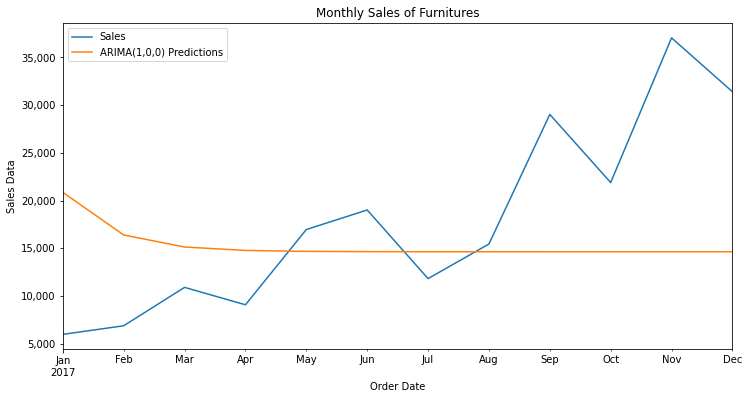

In [296]:
# Plot predictions against known values
title = 'Monthly Sales of Furnitures'
ylabel='Sales Data'
xlabel='Order Date'

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)

### Evaluate the Model

In [297]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Sales'], predictions)
print(f'ARIMA(1,0,0) MSE Error: {error:11.10}')

ARIMA(1,0,0) MSE Error: 120032385.7


In [298]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Sales'], predictions)
print(f'ARIMA(1,0,0) RMSE Error: {error:11.10}')

ARIMA(1,0,0) RMSE Error: 10955.92925


### Retrain the model

In [299]:
model = ARIMA(df['Sales'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('ARIMA(1,0,0) Forecast')

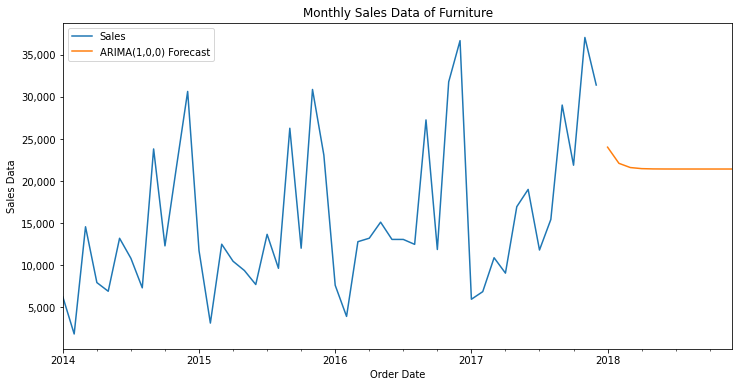

In [302]:
# Plot predictions against known values
title = 'Monthly Sales Data of Furniture'
ylabel='Sales Data'
xlabel='Order Date'

ax = df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)

## Seasonal Autoregressive Integreted Moving Averages(SARIMA)

It's an extension of the ARIMA model that includes additional components to capture seasonality in time series data. SARIMA models are particularly useful for analyzing and forecasting data with recurring patterns that repeat over fixed intervals.

SARIMA models build upon the concepts of ARIMA models, with the addition of seasonal components:

1. **Seasonal AutoRegressive (SAR) Component**: This component captures the relationship between the current value and past values at the same seasonal lag. It's similar to the AR component but operates over the seasonal interval.

2. **Seasonal Integrated (SI) Component**: Just like the non-seasonal integrated component in ARIMA, this component accounts for differencing the series at the seasonal interval to achieve seasonal stationarity.

3. **Seasonal Moving Average (SMA) Component**: This component captures the relationship between the current value and past error terms at the same seasonal lag. It's similar to the MA component but operates over the seasonal interval.

A SARIMA(p, d, q) × (P, D, Q, s) model is defined by these components:

- $p$ is the order of the non-seasonal AutoRegressive (AR) component.
- $d$ is the degree of non-seasonal differencing.
- $q$ is the order of the non-seasonal Moving Average (MA) component.
- $P$ is the order of the seasonal AutoRegressive (SAR) component.
- $D$ is the degree of seasonal differencing.
- $Q$ is the order of the seasonal Moving Average (SMA) component.
- $s$ is the number of time steps in each seasonal period.

The equation for a SARIMA(p, d, q) × (P, D, Q, s) model can be quite complex and includes both non-seasonal and seasonal components.

*SARIMA* models are particularly effective for time series datasets that exhibit seasonality, trends, and other complex patterns. These models allow you to capture and model the behavior of the data over multiple time scales, helping to improve forecasting accuracy.

To fit a SARIMA model, a similar process is followed as with ARIMA models. You need to determine the appropriate values of $p$, $d$, $q$, $P$, $D$, $Q$, and $s$ through analysis of autocorrelation and partial autocorrelation plots, as well as seasonal decomposition techniques. Once the model is specified, parameter estimation methods such as maximum likelihood estimation are used to fit the model to the data.


<div class="alert alert-info"><h4>Related Functions:</h4>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html'>sarimax.SARIMAX</a></strong><font color=green>(endog[, exog, order, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>sarimax.SARIMAXResults</a></strong><font color=green>(model, params, …[, …])</font>&nbsp;&nbsp;Class to hold results from fitting a SARIMAX model.</tt>

### Imports

In [304]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [305]:
#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


In [307]:
df = df.resample('MS').sum()

<Axes: xlabel='Order Date'>

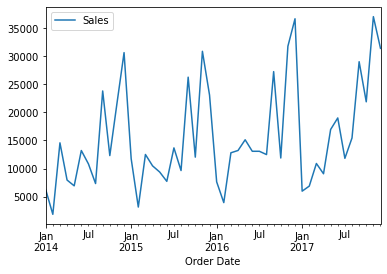

In [308]:
df.plot()

### ETS Decomposition


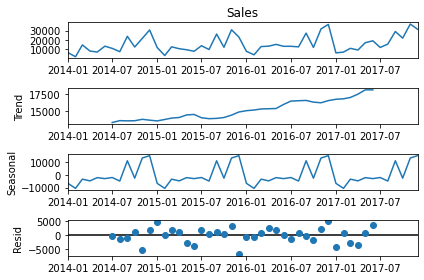

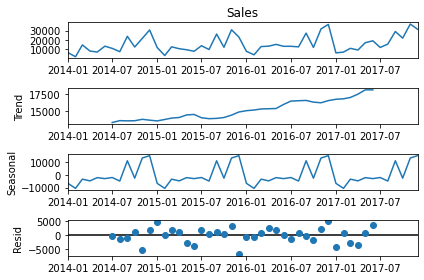

In [309]:
result = seasonal_decompose(df['Sales'], model='add')
result.plot()

### <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot more combinations to evaluate.

In [310]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df['Sales'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   48
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -349.872
Date:                  Sat, 26 Aug 2023   AIC                            707.744
Time:                          20:50:11   BIC                            714.078
Sample:                      01-01-2014   HQIC                           709.955
                           - 12-01-2017                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1616.5115   1257.009      1.286      0.198    -847.181    4080.205
ar.S.L12      -0.1196      0.087     -1.378      0.168      -0.290       0.051
ar.S.L24       0.1214      0.098      1.240      0.215      -0.070       0.313
sigma2      1.862e+07      0.036    5.1e+08      0.000    1.86e+07    1.86e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.71   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.40   Prob(JB):                         0.39
Heteroskedasticity (H):               0.96   Skew:                             0.55
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.55e+25. Standard errors may be unstable.
"""

### Data Split

In [311]:
# Set one year for testing
train = df.iloc[:len(df)-6]
test = df.iloc[len(df)-6:]

### Fit the model

In [313]:
model = SARIMAX(train['Sales'],order=(0,1,3),seasonal_order=(2,1,0,12))
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29091D+00    |proj g|=  1.36692D+00

At iterate    5    f=  6.89978D+00    |proj g|=  6.06503D-02


 This problem is unconstrained.



At iterate   10    f=  6.89834D+00    |proj g|=  3.91161D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     16      1     0     0   1.363D-05   6.898D+00
  F =   6.8983397481910451     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   42
Model:             SARIMAX(0, 1, 3)x(2, 1, [], 12)   Log Likelihood                -289.730
Date:                             Sat, 26 Aug 2023   AIC                            591.461
Time:                                     20:52:16   BIC                            599.664
Sample:                                 01-01-2014   HQIC                           594.030
                                      - 06-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3976      0.146     -2.722      0.006      -0.684      -0.111
ma.L2         -0.1639      0.156     -1.053      0.292      -0.469       0.141
ma.L3         -0.1625      0.167     -0.972      0.331      -0.490       0.165
ar.S.L12      -0.1664      0.118     -1.404      0.160      -0.399       0.066
ar.S.L24       0.2224      0.130      1.710      0.087      -0.033       0.477
sigma2      2.461e+07   5.24e-10    4.7e+16      0.000    2.46e+07    2.46e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.15   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.14   Prob(JB):                         0.65
Heteroskedasticity (H):               0.75   Skew:                             0.17
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.01e+32. Standard errors may be unstable.
"""

In [315]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.


In [316]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Sales'][i]}")

predicted=18982.66877, expected=11813.021999999999
predicted=15746.93545, expected=15441.874
predicted=29761.95657, expected=29028.206000000002
predicted=13953.797  , expected=21884.0682
predicted=35822.90086, expected=37056.715
predicted=34853.24127, expected=31407.4668


### Plot the predictions

[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

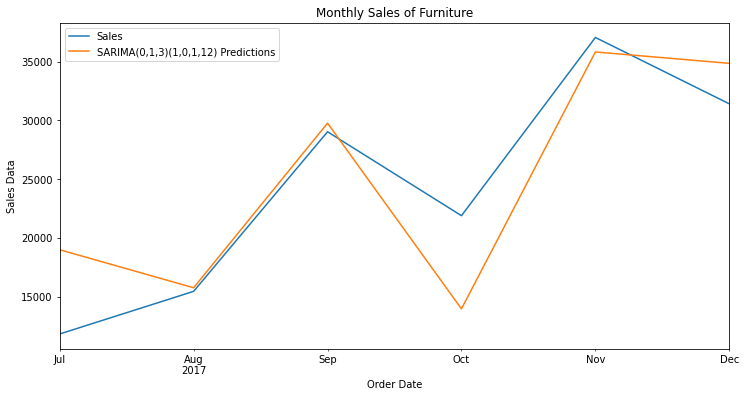

In [317]:
# Plot predictions against known values
title = 'Monthly Sales of Furniture'
ylabel='Sales Data'
xlabel='Order Date'

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

### Model's Evaluation

In [319]:
from sklearn.metrics import mean_squared_error


error = mean_squared_error(test['Sales'], predictions)
print(f'SARIMA(2,0,1,12) MSE Error: {error:11.10}')

SARIMA(2,0,1,12) MSE Error: 21386691.26


### Forecast in future

Let's retrain the model on whole data and forecast the future values.

In [323]:
model = SARIMAX(df['Sales'],order=(1,0,2),seasonal_order=(2,1,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+12,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34114D+00    |proj g|=  1.71764D-01

At iterate    5    f=  7.33086D+00    |proj g|=  7.19168D-03

At iterate   10    f=  7.32688D+00    |proj g|=  7.54832D-03

At iterate   15    f=  7.32657D+00    |proj g|=  3.72058D-03

At iterate   20    f=  7.32653D+00    |proj g|=  4.71292D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     23      1     0     0   4.713D-05   7.327D+00
  F =   7.3265270010504215     

CONVERG

[Text(0.5, 0, 'Order Date'), Text(0, 0.5, 'Sales Data')]

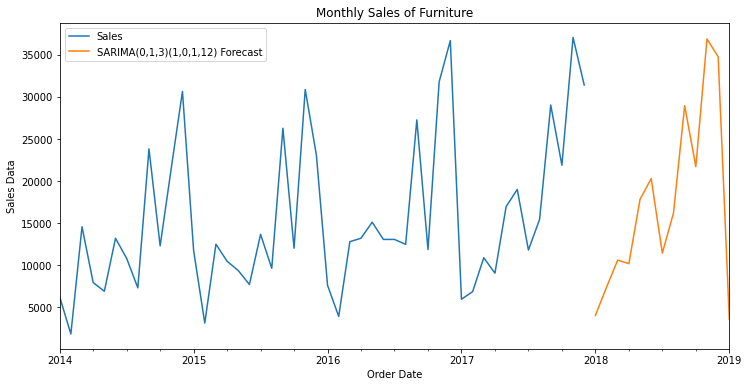

In [324]:
# Plot predictions against known values
# Plot predictions against known values
title = 'Monthly Sales of Furniture'
ylabel='Sales Data'
xlabel='Order Date'

ax = df['Sales'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

## SARIMAX

- **SARIMAX** stands for Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors. 
- It's an extension of the SARIMA model that allows you to incorporate external factors, also known as exogenous variables or regressors, into the time series forecasting process. 
- These external variables can help improve the accuracy of forecasts by accounting for additional information that might impact the time series.

SARIMAX models combine the concepts of SARIMA models with the ability to include exogenous variables. The main components of SARIMAX models are as follows:

1. **Seasonal AutoRegressive (SAR) Component**: Captures the relationship between the current value and past values at the same seasonal lag, similar to the SAR component in SARIMA.

2. **Seasonal Integrated (SI) Component**: Involves differencing the series at the seasonal interval to achieve seasonal stationarity, similar to the SI component in SARIMA.

3. **Seasonal Moving Average (SMA) Component**: Models the relationship between the current value and past error terms at the same seasonal lag, similar to the SMA component in SARIMA.

4. **Exogenous (X) Variables**: These are external factors or regressors that you believe might influence the time series. Including exogenous variables can help the model capture additional patterns and relationships beyond the inherent time series components. These variables could be economic indicators, weather data, marketing campaigns, etc.

SARIMAX models are represented as *SARIMAX(p, d, q) × (P, D, Q, s)*, where the $p$, $d$, $q$, $P$, $D$, $Q$, and $s$ parameters have the same meanings as in a regular SARIMA model.

The equation for a SARIMAX(p, d, q) × (P, D, Q, s) model with exogenous variables can be complex, as it involves both the seasonal and non-seasonal components, as well as the influence of the exogenous variables. The equation includes terms to account for the relationships between the time series, its lagged values, seasonal terms, and the exogenous variables.

Fitting a SARIMAX model with exogenous variables involves not only identifying the appropriate orders for the seasonal and non-seasonal components but also selecting and incorporating relevant exogenous variables. The estimation process usually involves statistical methods such as maximum likelihood estimation.

**SARIMAX** models are powerful tools for time series forecasting, especially when you have access to additional external data that might impact the behavior of the time series you're analyzing. They provide a way to incorporate multiple sources of information into your forecasting process, potentially leading to more accurate and robust predictions.

<div class="alert alert-info"><h4>Related Functions:</h4>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html'>sarimax.SARIMAX</a></strong><font color=green>(endog[, exog, order, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>sarimax.SARIMAXResults</a></strong><font color=green>(model, params, …[, …])</font>&nbsp;&nbsp;Class to hold results from fitting a SARIMAX model.</tt>


### Imports

In [343]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima     
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### Inspect the data

In [344]:
#plot the sales data of Office Supplies
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum, 'Quantity':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales,Quantity
Order Date,,
2014-01-06,2573.820,9
2014-01-07,76.728,3
2014-01-10,51.940,1
2014-01-11,9.940,2


In [345]:
df = df.resample('W').sum()

df.head()

,Sales,Quantity
Order Date,,
2014-01-12,2712.428,15
2014-01-19,1250.473,24
2014-01-26,1655.958,26
2014-02-02,623.666,5
2014-02-09,14.560,2


<Axes: xlabel='Order Date'>

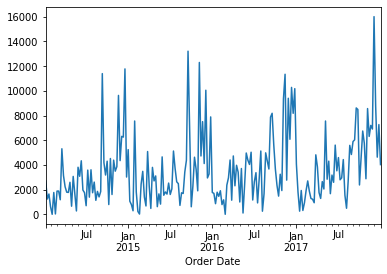

In [346]:
df['Sales'].plot()

<Axes: xlabel='Order Date'>

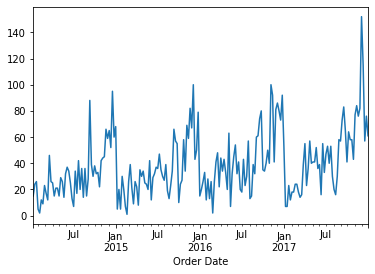

In [347]:
df['Quantity'].plot()

Here we can treat `Quantity` as exogenous variable.

### ETS Decomposition


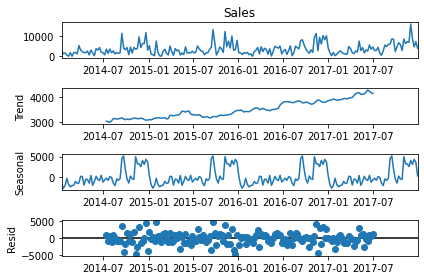

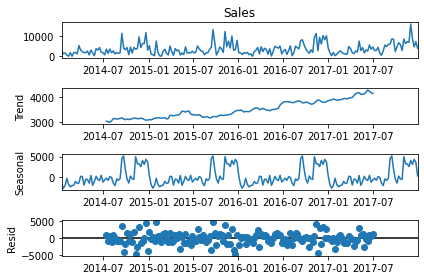

In [348]:
result_sales = seasonal_decompose(df['Sales'])

result_sales.plot()

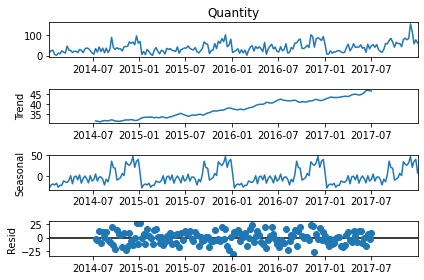

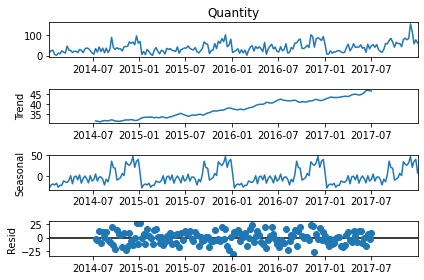

In [349]:
result_sales = seasonal_decompose(df['Quantity'])

result_sales.plot()

### Test for stationarity



In [350]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [351]:
adf_test(df['Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.444275
p-value                   0.009539
# lags used               6.000000
# observations          201.000000
critical value (1%)      -3.463309
critical value (5%)      -2.876029
critical value (10%)     -2.574493
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [352]:
adf_test(df['Quantity'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.457632
p-value                   0.000234
# lags used               4.000000
# observations          203.000000
critical value (1%)      -3.462980
critical value (5%)      -2.875885
critical value (10%)     -2.574416
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


<tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [353]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df['Sales'],bseasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  208
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1917.198
Date:                Tue, 29 Aug 2023   AIC                           3842.396
Time:                        01:18:01   BIC                           3855.727
Sample:                    01-12-2014   HQIC                          3847.787
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7864      0.166      4.732      0.000       0.461       1.112
ma.L1         -1.4946      0.201     -7.447      0.000      -1.888      -1.101
ma.L2          0.5044      0.183      2.763      0.006       0.147       0.862
sigma2      6.442e+06   4.47e-08   1.44e+14      0.000    6.44e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               130.12
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.43   Skew:                             1.32
Prob(H) (two-sided):                  0.14   Kurtosis:                         5.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.36e+30. Standard errors may be unstable.
"""

### Split the Data

In [354]:
len(df)

208

In [355]:
train = df.iloc[:170]
test = df.iloc[170:]

### Fit the model

In [356]:
model = SARIMAX(train['Sales'],order=(1,1,2) ,enforce_invertibility=False)
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57394D+00    |proj g|=  2.46033D-01

At iterate    5    f=  9.25322D+00    |proj g|=  9.27008D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     14      1     0     0   7.396D-05   9.253D+00
  F =   9.2531449377285586     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  170
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1573.035
Date:                Tue, 29 Aug 2023   AIC                           3154.069
Time:                        01:20:31   BIC                           3166.589
Sample:                    01-12-2014   HQIC                          3159.150
                         - 04-09-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7910      0.528     -1.499      0.134      -1.825       0.243
ma.L1         -0.2794      0.479     -0.583      0.560      -1.218       0.660
ma.L2         -0.9240      0.525     -1.759      0.079      -1.953       0.105
sigma2      6.972e+06   9.33e+05      7.472      0.000    5.14e+06     8.8e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.41   Jarque-Bera (JB):                70.94
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             1.14
Prob(H) (two-sided):                  0.44   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).


In [357]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(1,0,0)(2,0,0,7) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Visitors per day')]

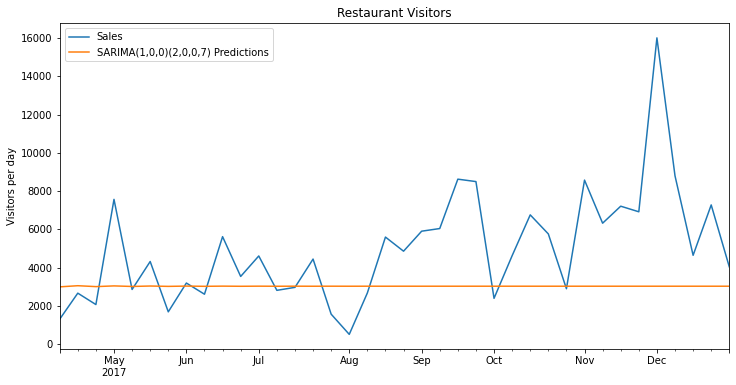

In [359]:
# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


In [360]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['Sales'], predictions)
error2 = rmse(test['Sales'], predictions)

print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2:11.10}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 12077452.14
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 3475.262887


In [361]:
df.columns

Index(['Sales', 'Quantity'], dtype='object')

In [364]:
model = SARIMAX(train['Sales'],exog=train['Quantity'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.62475D+00    |proj g|=  1.90302D-02

At iterate    5    f=  8.62437D+00    |proj g|=  4.27492D-03

At iterate   10    f=  8.62420D+00    |proj g|=  8.86735D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   3.699D-05   8.624D+00
  F =   8.6242022664645681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  170
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -1466.114
Date:                           Tue, 29 Aug 2023   AIC                           2942.229
Time:                                   01:22:51   BIC                           2957.908
Sample:                               01-12-2014   HQIC                          2948.591
                                    - 04-09-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Quantity      97.6600      2.403     40.643      0.000      92.950     102.369
ar.L1         -0.0783      0.072     -1.086      0.277      -0.220       0.063
ar.S.L7        0.2222      0.057      3.874      0.000       0.110       0.335
ar.S.L14      -0.0828      0.094     -0.879      0.379      -0.267       0.102
sigma2      1.903e+06   1.58e+05     12.024      0.000    1.59e+06    2.21e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               295.39
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             1.56
Prob(H) (two-sided):                  0.58   Kurtosis:                         8.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [365]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Quantity']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Visitors per day')]

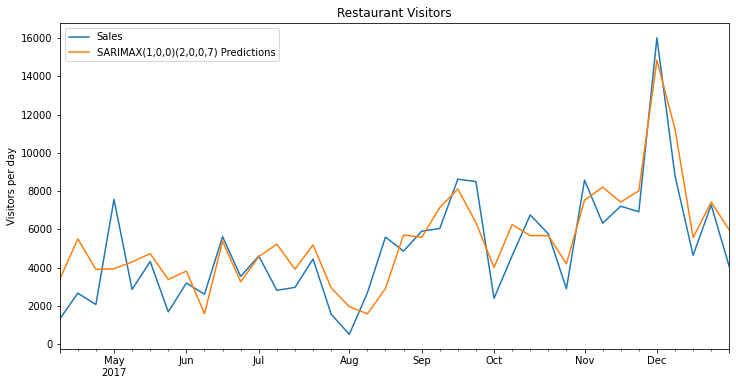

In [368]:
# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['Sales'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


### Evaluate the Model

In [370]:
# Print values from SARIMA above
print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2:11.10}')
print()

error1x = mse(test['Sales'], predictions)
error2x = rmse(test['Sales'], predictions)

# Print new SARIMAX values
print(f'SARIMAX(1,0,0)(2,0,0,7) MSE Error: {error1x:11.10}')
print(f'SARIMAX(1,0,0)(2,0,0,7) RMSE Error: {error2x:11.10}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 12077452.14
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 3475.262887

SARIMAX(1,0,0)(2,0,0,7) MSE Error: 2317778.504
SARIMAX(1,0,0)(2,0,0,7) RMSE Error: 1522.425205


### Retrain the model on the full data, and forecast the future
We're going to forecast 39 days into the future, and use the additional holiday data

In [375]:
model = SARIMAX(df['Sales'],exog=df['Quantity'],order=(1,2,1),seasonal_order=(1,2,2,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = df[169:][['Quantity']]
fcast = results.predict(len(df),len(df)+38,exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Forecast')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.90831D+00    |proj g|=  4.55523D-01

At iterate    5    f=  8.77071D+00    |proj g|=  2.46477D-02

At iterate   10    f=  8.76041D+00    |proj g|=  1.28819D-01


 This problem is unconstrained.



At iterate   15    f=  8.75126D+00    |proj g|=  8.71626D-03

At iterate   20    f=  8.75085D+00    |proj g|=  2.63679D-04

At iterate   25    f=  8.75081D+00    |proj g|=  5.76846D-03

At iterate   30    f=  8.74957D+00    |proj g|=  1.55926D-02

At iterate   35    f=  8.74906D+00    |proj g|=  7.27861D-04

At iterate   40    f=  8.74905D+00    |proj g|=  3.18560D-04

At iterate   45    f=  8.74903D+00    |proj g|=  4.41136D-03

At iterate   50    f=  8.74786D+00    |proj g|=  1.46329D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55      1     0     0   1.463D-02   8.748D+00
  F =   8.74785703008

[Text(0.5, 0, ''), Text(0, 0.5, 'Visitors per day')]

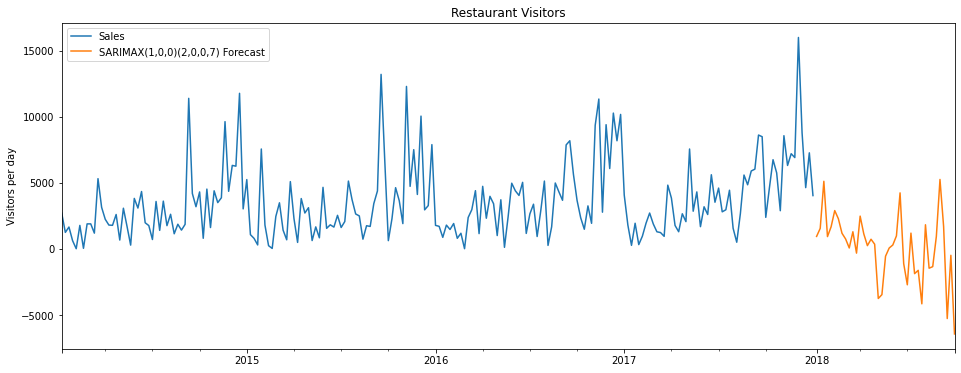

In [376]:
# Plot the forecast alongside historical values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = df['Sales'].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)